# Analiza skupien - uczenie nienadzorowane

## Zadanie 1 - k - means

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

In [13]:
X, y = make_blobs(n_samples=210,
                 centers=3,
                 n_features=2,
                 cluster_std=0.7,
                 shuffle=True,
                 random_state=0)

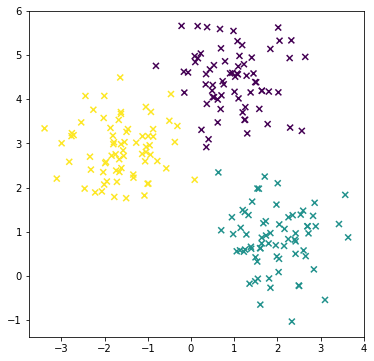

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='x')
plt.show()

In [15]:
# Utworzenie obiektu i dopasowanie
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4,
           init='random',
           n_init=10,
           max_iter=10,
           tol=1e-4,
           random_state=0)

# Dopasowanie
y_pred = km.fit_predict(X)

Text(0.5, 1.0, 'init = random')

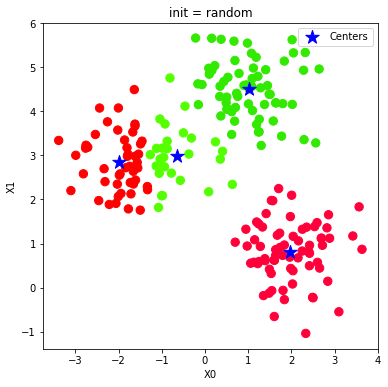

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism) 
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('init = random')

In [17]:
# Miara znieksztalcenia
print('Inertia = {}'.format(km.inertia_))

Inertia = 167.24764717615773


## Zadanie 2 - k - means ++

In [18]:
km_pp = KMeans(n_clusters=4,
           init='k-means++',
           n_init=10,
           max_iter=10,
           tol=1e-4,
           random_state=0)

# Dopasowanie
y_pred_pp = km_pp.fit_predict(X)

Text(0.5, 1.0, 'init = k-means++')

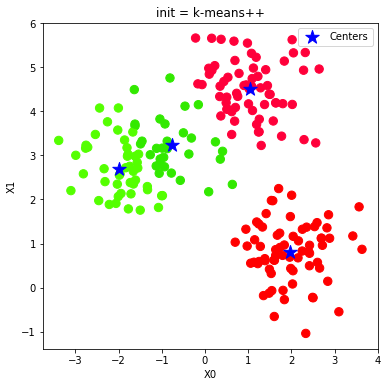

In [19]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], s=70, c=km_pp.labels_, cmap=plt.cm.prism) 
plt.scatter(km_pp.cluster_centers_[:, 0], km_pp.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('init = k-means++')

In [20]:
# Miara znieksztalcenia
print('Inertia = {}'.format(km_pp.inertia_))

Inertia = 167.81391377995595


## Zadanie 3 - metoda lokciowa - optymalna liczba skupien

Text(0, 0.5, 'Ínertia')

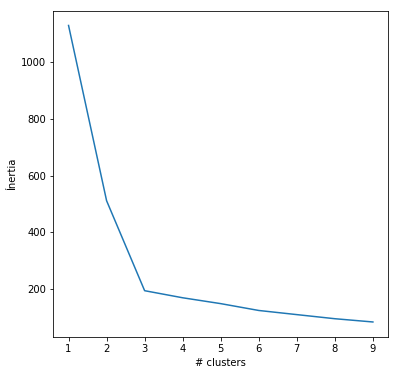

In [21]:
inertias = []
for clusters in range(1, 10):
    km = KMeans(n_clusters=clusters,
           init='k-means++',
           n_init=10,
           max_iter=10,
           tol=1e-4,
           random_state=0)
    km.fit_predict(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(range(1, 10), inertias)
plt.xlabel('# clusters')
plt.ylabel('Ínertia')

Number of clusters: 3

## Zadanie 4

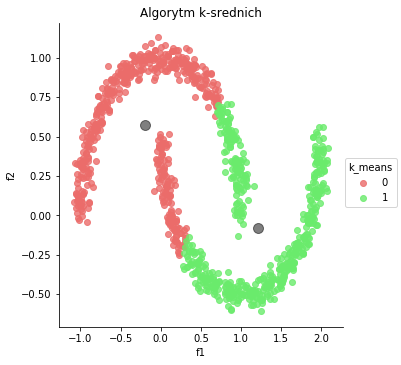

In [11]:
from sklearn.datasets.samples_generator import make_moons
import seaborn as sns
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

# Utworzenie obiektu i dopasowanie
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2,
           init='random',
           n_init=10,
           max_iter=10,
           tol=1e-4,
           random_state=0)

# Dopasowanie
y_km = km.fit_predict(X_moon)
 
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
# plt.scatter(X_moon[:,0], X_moon[:,1], s=70, c=km.labels_, cmap=plt.cm.prism) 
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='black', s=100, alpha=0.5)
plt.show()